<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>Explore the Gemini API</h2>
  <p>The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.
  </p>
  <strong>How to get started</strong>
    <ol>
      <li>Go to <a href="https://aistudio.google.com/">Google AI Studio</a> and log in with your Google account.</li>
      <li><a href="https://aistudio.google.com/app/apikey">Create an API key</a>.</li>
      <li>Use a quickstart for <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Prompting.ipynb">Python</a>, or call the REST API using <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.</li>
      </ol>
  <strong>Explore use cases</strong>
    <ul>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Market_a_Jet_Backpack.ipynb">Create a marketing campaign</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Audio.ipynb">Analyze audio recordings</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/System_instructions.ipynb">Use System instructions in chat</a></li>
    </ul>
  <p>To learn more, check out the <a href="https://github.com/google-gemini/cookbook">Gemini cookbook</a> or visit the <a href="https://ai.google.dev/docs/">Gemini API documentation</a>.
  </p>
</div>


<msg desc="Text shown above a link to https://www.youtube.com/watch?v=V7RXyqFUR98 which highlights some helpful features in Colab">Colab now has AI features powered by <a href="https://gemini.google.com">Gemini</a>. The video below provides information on how to use these features, whether you're new to Python, or a seasoned veteran.</msg>

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  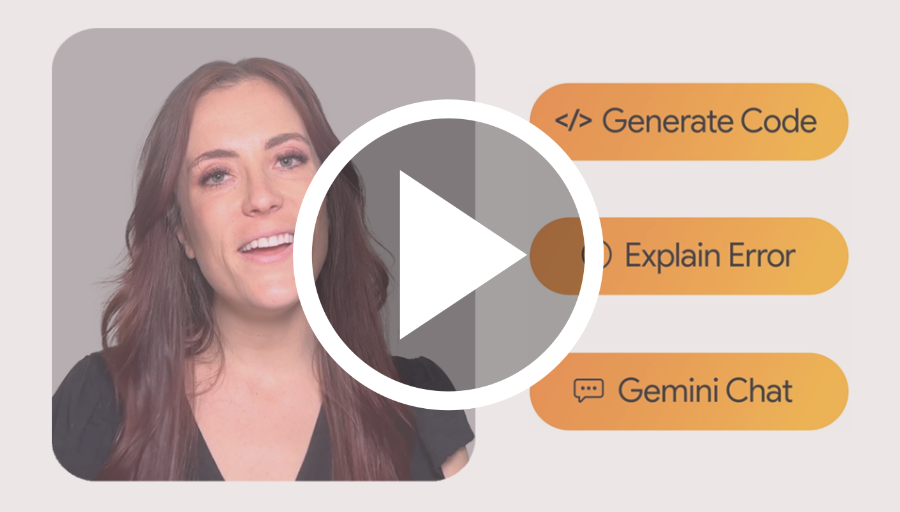
  </a>
</center>

[*********************100%***********************]  1 of 1 completed
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1we4cvmv/k_3ayxk1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1we4cvmv/630fdnkd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14858', 'data', 'file=/tmp/tmp1we4cvmv/k_3ayxk1.json', 'init=/tmp/tmp1we4cvmv/630fdnkd.json', 'output', 'file=/tmp/tmp1we4cvmv/prophet_models4sbldsk/prophet_model-20241111105559.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:55:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:56:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


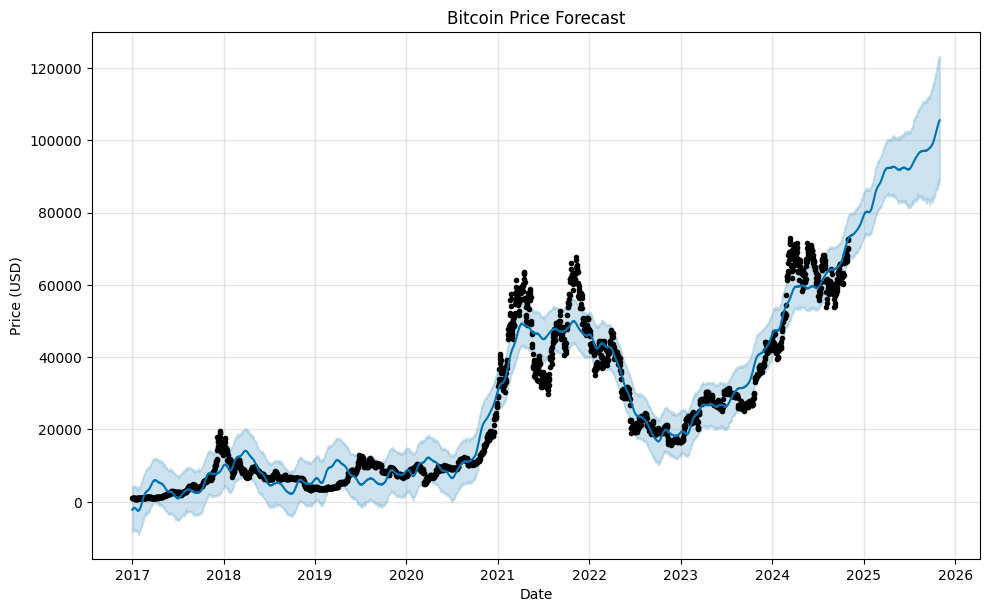

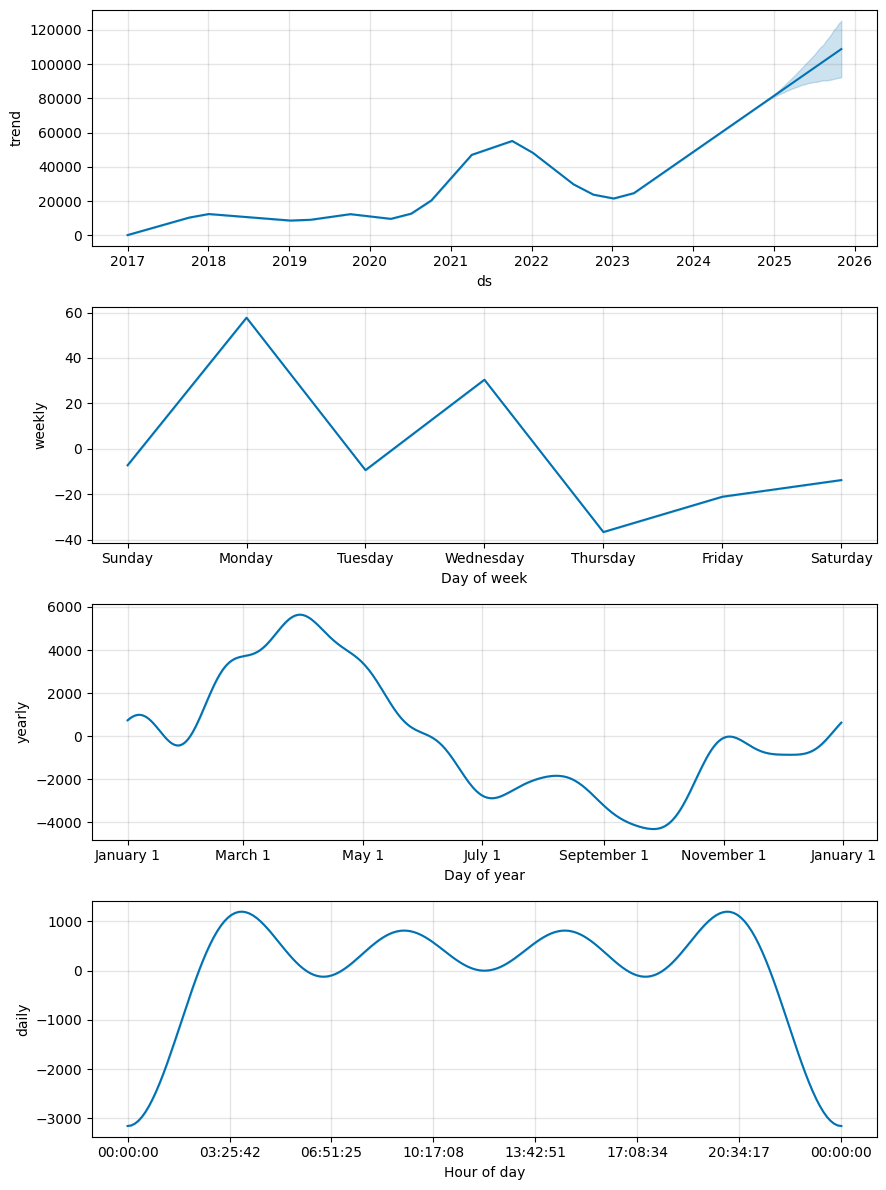

             ds           yhat    yhat_lower     yhat_upper
3221 2025-10-27  104877.498408  87826.592737  122817.322449
3222 2025-10-28  105011.119346  89433.687891  122460.728566
3223 2025-10-29  105236.595074  87608.634688  123029.083422
3224 2025-10-30  105339.756250  89125.699102  121725.986640
3225 2025-10-31  105509.969906  88530.631041  123306.150500


In [1]:
# prompt: Timeseries Bitcoin Price prediction using prophet and yahoofinance

#!pip install holidays==0.24
#!pip install prophet==1.1.2
#!pip install yfinance

import yfinance as yf
import holidays
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Download Bitcoin historical data from Yahoo Finance
bitcoin_data = yf.download('BTC-USD', start='2017-01-01', end='2024-11-01')

# Prepare data for Prophet
df_prophet = bitcoin_data[['Close']].reset_index()
df_prophet = df_prophet.rename(columns={'Date': 'ds', 'Close': 'y'})

# Ensure 'ds' is in datetime format
df_prophet['ds'] = df_prophet['ds'].dt.date
df_prophet['y'] = df_prophet['y'].astype(int)
df_prophet.columns = range(df_prophet.shape[1])

# code to convert tabular array into string array
dateArray= [str(item) for item in df_prophet[0]]
yearArray= [str(item) for item in df_prophet[1]]

#
new_data = {'ds':dateArray , 'y': yearArray}

#data2 = {'ds': ['2020-01-01', '2020-01-02', '2020-01-03'], 'y': [100, 110, 120]}
df_final = pd.DataFrame(new_data)

# Create and fit the Prophet model
model = Prophet(daily_seasonality = True)
model.fit(df_final)

# Create a future dataframe for forecasting
future = model.make_future_dataframe(periods=365)  # Forecast for the next year

# Generate predictions
forecast = model.predict(future)

# Plot the forecast
fig1 = model.plot(forecast)
plt.title('Bitcoin Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

# Plot components of the forecast (trend, seasonality, etc.)
fig2 = model.plot_components(forecast)
plt.show()

# Print some predictions
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

